### Importing stuffs and Loading data

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
tf.experimental.numpy.experimental_enable_numpy_behavior()

/tmp/ipykernel_580836/2341719916.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-04-16 01:50:11.477866: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 01:50:11.477905: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 01:50:11.478588: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable

In [2]:
traindf = pd.read_csv('data/train.csv')
testdf = pd.read_csv('data/test.csv')
traindf.drop(['id'], axis=1, inplace=True)
testdf = testdf.set_index('id')

In [3]:
#print(testdf.isna().sum())
#print("==============")
#print(traindf.isna().sum())

In [4]:
#sns.pairplot(traindf, diag_kind='kde')

### Basic Preprocessing

In [5]:
traindf['Sex'] = traindf['Sex'].map({'F': 'Female', 'I': 'Idk', 'M': 'Male'})
traindf = pd.get_dummies(traindf, columns=['Sex'], prefix='', prefix_sep='', dtype=np.float32)
traindf

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings,Female,Idk,Male
0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11,1.0,0.0,0.0
1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11,1.0,0.0,0.0
2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6,0.0,1.0,0.0
3,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10,0.0,0.0,1.0
4,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
90610,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6,0.0,0.0,1.0
90611,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9,0.0,0.0,1.0
90612,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6,0.0,1.0,0.0
90613,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6,0.0,1.0,0.0


In [6]:
testdf['Sex'] = testdf['Sex'].map({'F': 'Female', 'I': 'Idk', 'M': 'Male'})
testdf = pd.get_dummies(testdf, columns=['Sex'], prefix='', prefix_sep='', dtype=np.float32)
testdf

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Female,Idk,Male
id,,,,,,,,,,
90615,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005,0.0,0.0,1.0
90616,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750,0.0,0.0,1.0
90617,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405,0.0,0.0,1.0
90618,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350,0.0,0.0,1.0
90619,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
151021,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500,0.0,1.0,0.0
151022,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050,1.0,0.0,0.0
151023,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650,0.0,1.0,0.0


In [7]:
target = traindf['Rings']
traindf.drop(['Rings'], axis=1, inplace=True)
traindf.shape

(90615, 10)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(traindf, target, test_size=0.2, random_state=69)

In [9]:
#y_train = y_train/30
#y_val = y_val/30

## Ooga Booga lets do some training xd

In [10]:
def rmsle(y_true, y_pred):
    #lmfaoxddddd = np.sqrt(np.mean((np.log(1+y_pred)-np.log(1+y_true))**2))
    #y_true = y_true.astype('float32')
    tf_lmfaoxddddd = tf.sqrt(tf.reduce_mean((tf.math.log(1+y_pred.astype('float32'))-tf.math.log(1+y_true.astype('float32')))**2))
    return tf_lmfaoxddddd

def make_model():
    model = Sequential()
    model.add(Input(10))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1,))
    
    model.compile(optimizer='adam', loss=rmsle)
    return model

In [11]:
def make_model():
    model = Sequential()
    model.add(Input(10))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(80, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(80, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(80, activation='relu'))
    model.add(Dense(40, activation='relu'))
    model.add(Dense(1,))
    
    model.compile(optimizer='adam', loss=rmsle)
    return model

In [12]:
model = make_model()
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val))

2024-04-16 01:50:12.995874: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 01:50:13.013454: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 01:50:13.013551: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.


Epoch 1/50


2024-04-16 01:50:13.015792: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 01:50:13.015842: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 01:50:13.015878: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 01:50:13.120873: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0a:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-04-16 01:50:13.120945: I external/local_xla/xla/stream_executor

1133/1133 [==============================] - 8s 6ms/step - loss: 0.2146 - val_loss: 0.1593
Epoch 2/50
1133/1133 [==============================] - 6s 5ms/step - loss: 0.1560 - val_loss: 0.1560
Epoch 3/50
1133/1133 [==============================] - 6s 5ms/step - loss: 0.1551 - val_loss: 0.1584
Epoch 4/50
1133/1133 [==============================] - 6s 5ms/step - loss: 0.1541 - val_loss: 0.1577
Epoch 5/50
1133/1133 [==============================] - 6s 5ms/step - loss: 0.1537 - val_loss: 0.1567
Epoch 6/50
1133/1133 [==============================] - 6s 6ms/step - loss: 0.1530 - val_loss: 0.1590
Epoch 7/50
1133/1133 [==============================] - 6s 6ms/step - loss: 0.1528 - val_loss: 0.1544
Epoch 8/50
1133/1133 [==============================] - 6s 5ms/step - loss: 0.1527 - val_loss: 0.1579
Epoch 9/50
1133/1133 [==============================] - 6s 5ms/step - loss: 0.1524 - val_loss: 0.1554
Epoch 10/50
1133/1133 [==============================] - 6s 5ms/step - loss: 0.1525 - val_los

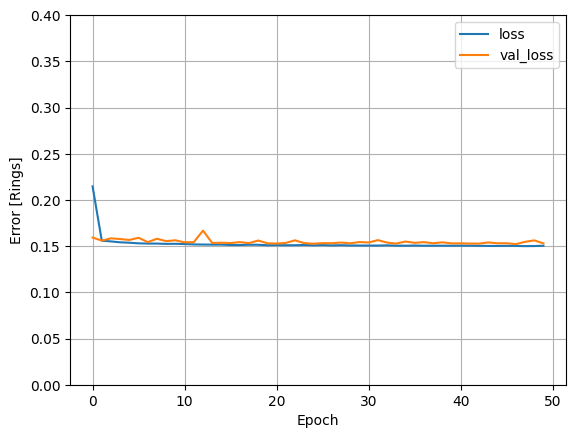

In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 0.4])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Rings]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [14]:
predictions = model.predict(testdf)
rounded_predictions = np.round(predictions).astype(int)
outputdf = pd.DataFrame(rounded_predictions, columns=['Rings'])
outputdf['id'] = testdf.index

cols = list(outputdf.columns)
cols.reverse()
outputdf = outputdf[cols]

1888/1888 [==============================] - 3s 2ms/step


In [15]:
#outputdf.to_csv('submission.csv', index=False)
